# Allow for image level parameter input: added to *digipath_toolkit.py*

## *get_patch_location_array_for_image_level(run_parameters)*

## *get_patch_locations_preview_imagefor_image_level(run_parameters)*

In [1]:
import time
nb_start_time = time.time()

import os
import sys

from collections import OrderedDict
import argparse

import numpy as np
import pandas as pd
import yaml

from skimage.filters import threshold_otsu
from skimage.color import rgb2lab

from PIL import ImageDraw
from PIL import TiffImagePlugin as tip

import openslide

sys.path.insert(0, '../src/python')
from digipath_toolkit import *

COMMON_THUMBNAIL_DIVISOR = 20

data_dir = '../../DigiPath_MLTK_data/Aperio'
file_type_list=['.svs', '.tif', '.tiff']
fs_od = get_file_size_ordered_dict(data_dir, file_type_list)
list_number = 0
for k, v in fs_od.items():
    print('%3i %30s: %i'%(list_number, k,v))
    list_number += 1

  0         CMU-1-Small-Region.svs: 1938955
  1               JP2K-33003-1.svs: 63847265
  2           CMU-1-JP2K-33005.svs: 132565343
  3                      CMU-1.svs: 177552579
  4                      CMU-3.svs: 253815723
  5               JP2K-33003-2.svs: 289250433
  6                      CMU-2.svs: 390750635


In [2]:
#                         test data file for threshold_otsu
data_dir = '../../DigiPath_MLTK_data/Aperio'
image_file_name = 'CMU-1.svs'

run_parameters = dict()

run_parameters['wsi_filename'] = os.path.join(data_dir, image_file_name)
print('Image File:\n', run_parameters['wsi_filename'])

run_parameters['thumbnail_divisor'] = COMMON_THUMBNAIL_DIVISOR
run_parameters['patch_select_method'] = 'threshold_otsu' # 'threshold_rgb2lab'
run_parameters['patch_height'] = 224
run_parameters['patch_width'] = 224
run_parameters['threshold'] = 0

"""
                output & time test:                CALL - - get_patch_location_array()
"""
t0 = time.time()
patch_location_array = get_patch_location_array(run_parameters)
tt = time.time() - t0

print('%i images found\t%0.3f s\n'%(len(patch_location_array), tt))

print('type(patch_location_array) =',type(patch_location_array), '\t', len(patch_location_array),'\n')
for d in patch_location_array:
    print(d)

Image File:
 ../../DigiPath_MLTK_data/Aperio/CMU-1.svs
6596 images found	0.460 s

type(patch_location_array) = <class 'list'> 	 6596 

(105, 18408)
(329, 2952)
(329, 20424)
(553, 1384)
(777, 18632)
(777, 32968)
(777, 33192)
(1001, 29384)
(1001, 29608)
(1001, 29832)
(1001, 30056)
(1001, 30280)
(1001, 32072)
(1001, 38344)
(1001, 38568)
(1225, 26920)
(1225, 28936)
(1225, 29160)
(1225, 29384)
(1225, 29608)
(1225, 29832)
(1225, 30056)
(1225, 30280)
(1225, 30504)
(1225, 35432)
(1449, 25576)
(1449, 28936)
(1449, 29160)
(1449, 29384)
(1449, 29608)
(1449, 29832)
(1449, 30056)
(1449, 30280)
(1449, 30504)
(1449, 35432)
(1449, 36552)
(1673, 15720)
(1673, 28712)
(1673, 28936)
(1673, 29160)
(1673, 29384)
(1673, 29608)
(1673, 29832)
(1673, 30056)
(1673, 30280)
(1673, 30504)
(1897, 2056)
(1897, 28712)
(1897, 28936)
(1897, 29160)
(1897, 29384)
(1897, 29608)
(1897, 29832)
(1897, 30056)
(1897, 30280)
(1897, 30504)
(1897, 30728)
(1897, 36776)
(1897, 37000)
(1897, 37224)
(1897, 37448)
(2121, 13928)
(2121, 

(9737, 39240)
(9737, 39464)
(9737, 39688)
(9737, 39912)
(9737, 40136)
(9737, 40360)
(9737, 40584)
(9737, 40808)
(9737, 41032)
(9737, 41256)
(9737, 41480)
(9737, 41704)
(9737, 41928)
(9737, 42152)
(9737, 42376)
(9737, 42600)
(9737, 42824)
(9737, 43048)
(9737, 43272)
(9737, 43496)
(9737, 43720)
(9737, 43944)
(9961, 6760)
(9961, 17288)
(9961, 18408)
(9961, 19752)
(9961, 19976)
(9961, 26024)
(9961, 27368)
(9961, 27592)
(9961, 27816)
(9961, 28040)
(9961, 28264)
(9961, 28488)
(9961, 28712)
(9961, 28936)
(9961, 29160)
(9961, 29384)
(9961, 29608)
(9961, 29832)
(9961, 30056)
(9961, 30280)
(9961, 30504)
(9961, 30728)
(9961, 30952)
(9961, 31176)
(9961, 31400)
(9961, 31624)
(9961, 31848)
(9961, 32072)
(9961, 32296)
(9961, 32520)
(9961, 32744)
(9961, 32968)
(9961, 33192)
(9961, 33416)
(9961, 33640)
(9961, 33864)
(9961, 34088)
(9961, 34312)
(9961, 38120)
(9961, 38344)
(9961, 38568)
(9961, 38792)
(9961, 39016)
(9961, 39240)
(9961, 39464)
(9961, 39688)
(9961, 39912)
(9961, 40136)
(9961, 40360)
(9961, 

(16009, 6984)
(16009, 7208)
(16009, 7432)
(16009, 7656)
(16009, 7880)
(16009, 8104)
(16009, 8328)
(16009, 8552)
(16009, 8776)
(16009, 9000)
(16009, 9224)
(16009, 9448)
(16009, 9672)
(16009, 9896)
(16009, 10120)
(16009, 10344)
(16009, 10568)
(16009, 10792)
(16009, 11016)
(16009, 11240)
(16009, 11464)
(16009, 11688)
(16009, 11912)
(16009, 12136)
(16009, 12360)
(16009, 12584)
(16009, 12808)
(16009, 13032)
(16009, 13256)
(16009, 13480)
(16009, 13704)
(16009, 13928)
(16009, 14152)
(16009, 14376)
(16009, 30728)
(16009, 30952)
(16009, 31176)
(16009, 31400)
(16009, 31624)
(16009, 31848)
(16009, 32072)
(16009, 32296)
(16009, 32520)
(16009, 32744)
(16009, 32968)
(16009, 33192)
(16009, 33416)
(16009, 33640)
(16009, 33864)
(16009, 34088)
(16009, 34312)
(16009, 34536)
(16009, 34760)
(16009, 34984)
(16009, 35208)
(16009, 35432)
(16009, 35656)
(16009, 35880)
(16009, 36104)
(16009, 36328)
(16009, 36552)
(16233, 6312)
(16233, 6536)
(16233, 6760)
(16233, 6984)
(16233, 7208)
(16233, 7432)
(16233, 7656)
(

(22505, 6760)
(22505, 6984)
(22505, 7208)
(22505, 7432)
(22505, 7656)
(22505, 7880)
(22505, 8104)
(22505, 8328)
(22505, 8552)
(22505, 8776)
(22505, 9000)
(22505, 9224)
(22505, 9448)
(22505, 14152)
(22505, 14376)
(22505, 14600)
(22505, 14824)
(22505, 15048)
(22505, 15272)
(22505, 15496)
(22505, 15720)
(22505, 15944)
(22505, 16168)
(22505, 16392)
(22505, 16616)
(22505, 16840)
(22505, 17064)
(22505, 17288)
(22505, 17512)
(22505, 17736)
(22505, 17960)
(22505, 18184)
(22505, 18408)
(22505, 18632)
(22505, 18856)
(22505, 19080)
(22505, 19304)
(22505, 19528)
(22505, 19752)
(22505, 19976)
(22505, 20200)
(22505, 20424)
(22729, 2504)
(22729, 2728)
(22729, 2952)
(22729, 3176)
(22729, 3400)
(22729, 3624)
(22729, 3848)
(22729, 4072)
(22729, 4296)
(22729, 4520)
(22729, 4744)
(22729, 4968)
(22729, 5192)
(22729, 5416)
(22729, 5640)
(22729, 5864)
(22729, 6088)
(22729, 6312)
(22729, 6536)
(22729, 6760)
(22729, 6984)
(22729, 7208)
(22729, 7432)
(22729, 7656)
(22729, 7880)
(22729, 8104)
(22729, 8328)
(2272

In [3]:
n_levels = 3
for lvl_number in range(n_levels, 0, -1):
    im_lvl = lvl_number - 1
    t1 = time.time()
    run_parameters['image_level'] = im_lvl
    patch_location_array = get_patch_location_array_for_image_level(run_parameters)
    print('\nimage_level = %i,\nnumber of patches = %i'%(im_lvl, len(patch_location_array)))
    print('cell run time: %0.3f'%(time.time() - t1))


image_level = 2,
number of patches = 46
cell run time: 0.253

image_level = 1,
number of patches = 479
cell run time: 0.269

image_level = 0,
number of patches = 6596
cell run time: 0.449


image_level = 0,
number of patches = 6596
thumb image size: (2300, 1645) 
cell run time = 0.793


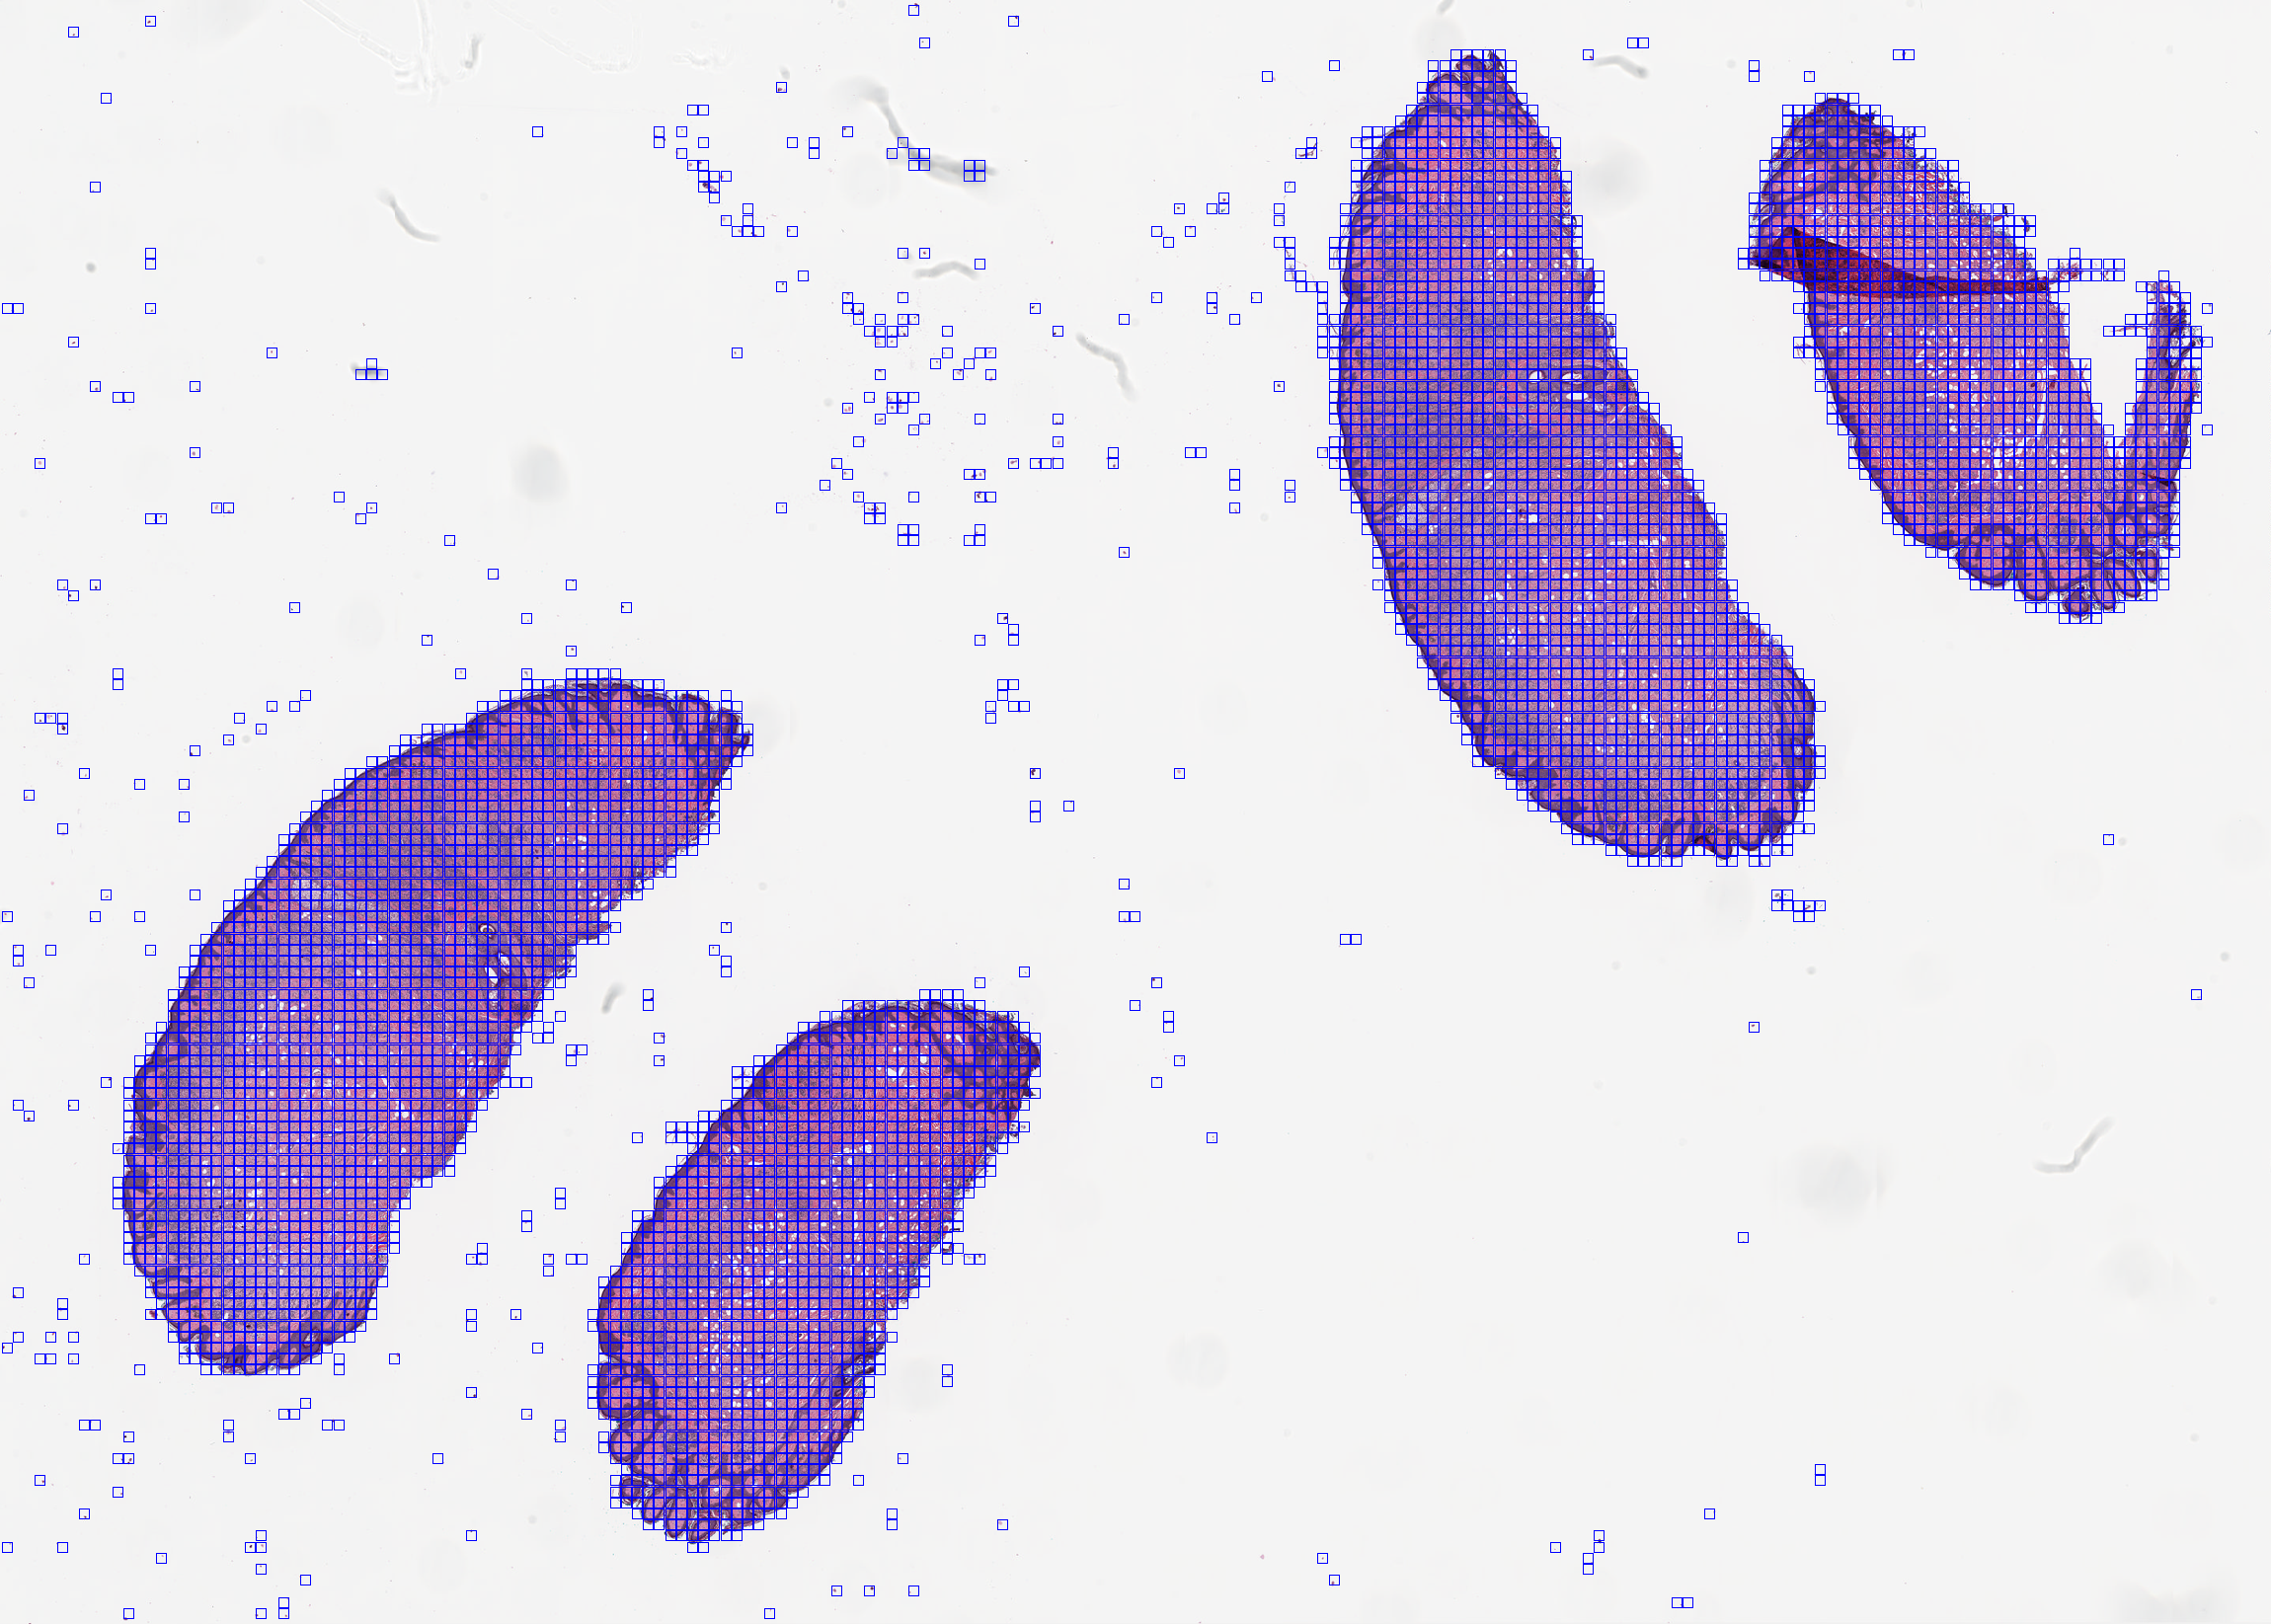

In [5]:
run_parameters['image_level'] = 0
run_parameters['thumbnail_divisor'] = COMMON_THUMBNAIL_DIVISOR

run_parameters['threshold'] = 0
run_parameters['border_color'] = 'blue'
t2 = time.time()
mask_im, prev_im, patch_array = get_patch_locations_preview_imagefor_image_level(run_parameters)
tt2 = time.time() - t2

print('image_level = %i,\nnumber of patches = %i'%(im_lvl, len(patch_array)))
print('thumb image size:', prev_im.size, '\ncell run time = %0.3f'%(tt2))
display(prev_im)

image_level = 0,
number of patches = 621
thumb image size: (1150, 822) 
cell run time = 0.580


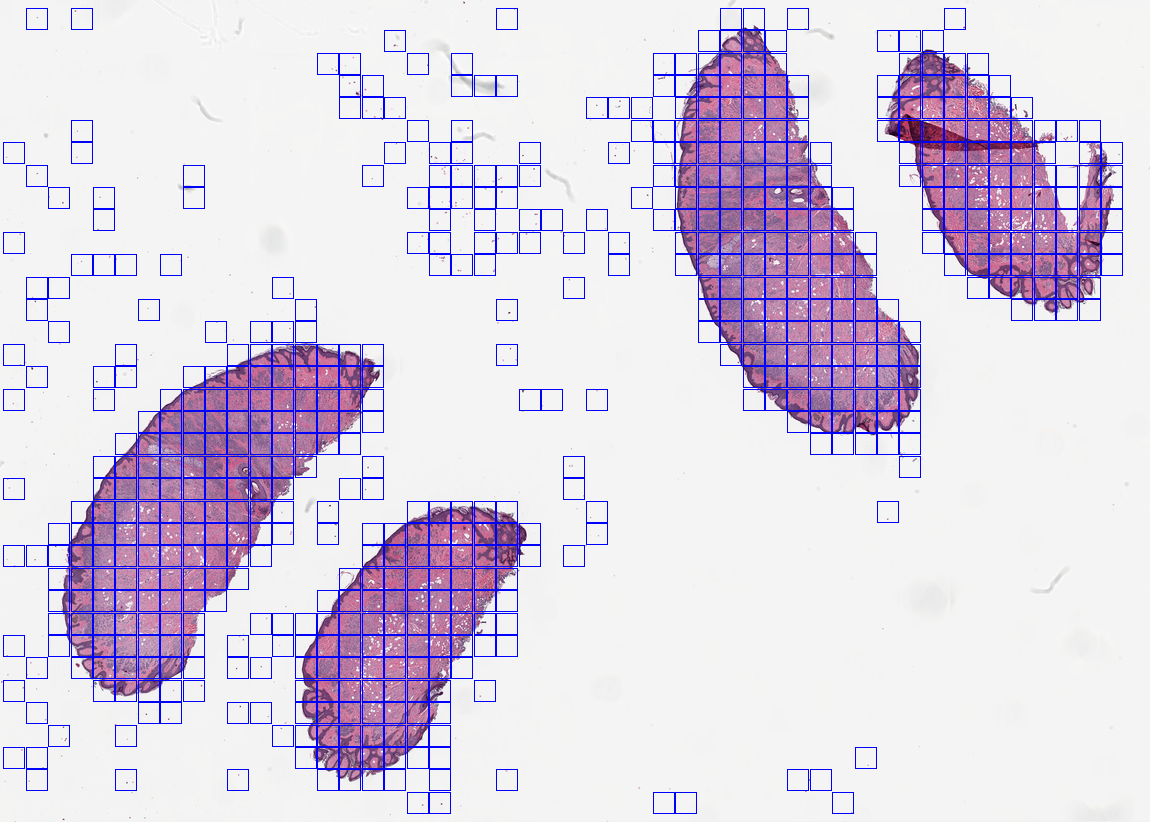

In [6]:
run_parameters['image_level'] = 1
run_parameters['thumbnail_divisor'] = COMMON_THUMBNAIL_DIVISOR
run_parameters['thumbnail_divisor'] = run_parameters['thumbnail_divisor'] // (run_parameters['image_level'] + 1)

run_parameters['threshold'] = 0
run_parameters['border_color'] = 'blue'
t2 = time.time()
mask_im, prev_im, patch_array = get_patch_locations_preview_imagefor_image_level(run_parameters)
tt2 = time.time() - t2

print('image_level = %i,\nnumber of patches = %i'%(im_lvl, len(patch_array)))
print('thumb image size:', prev_im.size, '\ncell run time = %0.3f'%(tt2))
display(prev_im)

image_level = 0,
number of patches = 56
thumb image size: (479, 342) 
cell run time = 0.513


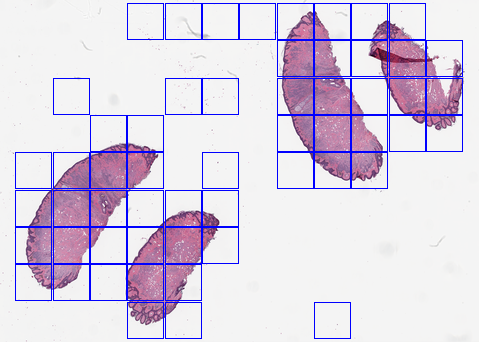

In [7]:
run_parameters['image_level'] = 2
run_parameters['thumbnail_divisor'] = COMMON_THUMBNAIL_DIVISOR
run_parameters['thumbnail_divisor'] = run_parameters['thumbnail_divisor'] // (run_parameters['image_level'] + 1)

run_parameters['threshold'] = 0
run_parameters['border_color'] = 'blue'
t2 = time.time()
mask_im, prev_im, patch_array = get_patch_locations_preview_imagefor_image_level(run_parameters)
tt2 = time.time() - t2

print('image_level = %i,\nnumber of patches = %i'%(im_lvl, len(patch_array)))
print('thumb image size:', prev_im.size, '\ncell run time = %0.3f'%(tt2))
display(prev_im)

In [ ]:
time_over_all = time.time() - nb_start_time
print('run all cells time %0.3f'%(time_over_all))